<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this 
transform = preprocessing.StandardScaler()
# TASK 2
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
# TASK 3
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)


we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [14]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [15]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [18]:
# ===== TASK 4 ONLY — Logistic Regression + GridSearchCV (cv=10) =====
# (No Task 5 outputs included)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# X = features, y = target  (use the exact column name 'Class' as in your data)
X = data.drop(columns=['Class'])
y = data['Class'].to_numpy()

# Split (same settings IBM uses)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y if len(np.unique(y)) > 1 else None
)

# Preprocess: numeric -> impute median + scale, categorical -> impute most_frequent + one-hot
num_feats = X.select_dtypes(include=['number']).columns.tolist()
cat_feats = [c for c in X.columns if c not in num_feats]

numeric_tf = Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ('scaler', StandardScaler())])
categorical_tf = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocess = ColumnTransformer(
    transformers=[('num', numeric_tf, num_feats),
                  ('cat', categorical_tf, cat_feats)],
    remainder='drop'
)

# Model + GridSearchCV
pipe = Pipeline([('preprocess', preprocess),
                 ('model', LogisticRegression(max_iter=500))])

param_grid = {
    'model__C': [0.01, 0.1, 1],
    'model__penalty': ['l2'],
    'model__solver': ['liblinear']
}

logreg_cv = GridSearchCV(pipe, param_grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("best score on validation (cv):", logreg_cv.best_score_)
# ===== END TASK 4 ONLY =====


tuned hyperparameters (best parameters): {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
best score on validation (cv): 0.9160714285714286


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [32]:
# TASK 5 — print accuracy on the test set (no plots)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import numpy as np

# Use your real target name if different from 'Class'
X = data.drop(columns=['Class'])
y = data['Class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y if len(np.unique(y)) > 1 else None
)

num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
                      ('scaler', StandardScaler())]), num_cols),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('onehot', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
])

pipe = Pipeline([('preprocess', preprocess),
                 ('model', LogisticRegression(max_iter=500))])

param_grid = {'model__C':[0.01,0.1,1], 'model__penalty':['l2'], 'model__solver':['liblinear']}
clf = GridSearchCV(pipe, param_grid, cv=10)
clf.fit(X_train, y_train)

print("Test set accuracy:", clf.score(X_test, y_test))


Test set accuracy: 0.8888888888888888


Lets look at the confusion matrix:


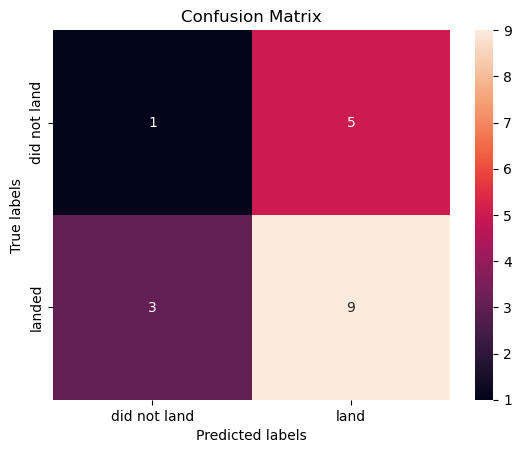

In [33]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [34]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [36]:
# ===== TASK 6 — SVM + GridSearchCV with proper preprocessing =====
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Use existing split if present; otherwise create it (target column 'Class')
try:
    X_train, X_test, Y_train, Y_test
except NameError:
    X = data.drop(columns=['Class'])
    y = data['Class'].to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.2, random_state=2, stratify=y if len(np.unique(y))>1 else None
    )

# Build preprocessing from the TRAIN columns
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                          ('onehot', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ],
    remainder='drop'
)

# SVM model inside a pipeline
svm_pipe = Pipeline([('preprocess', preprocess),
                     ('model', SVC())])

# Grid (IBM-style)
param_grid = [
    {'model__kernel': ['linear'], 'model__C': [1, 10, 100, 1000]},
    {'model__kernel': ['rbf'],    'model__C': [1, 10, 100, 1000], 'model__gamma': [0.1, 0.01, 0.001, 0.0001]}
]

svm_cv = GridSearchCV(svm_pipe, param_grid, cv=10)
svm_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("best score on validation (cv):", svm_cv.best_score_)
# ===== END TASK 6 =====


tuned hyperparameters (best parameters): {'model__C': 1, 'model__gamma': 0.01, 'model__kernel': 'rbf'}
best score on validation (cv): 0.6678571428571429


In [37]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'model__C': 1, 'model__gamma': 0.01, 'model__kernel': 'rbf'}
accuracy : 0.6678571428571429


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [38]:
print("Test set accuracy:", svm_cv.score(X_test, Y_test))


Test set accuracy: 0.6666666666666666


We can plot the confusion matrix


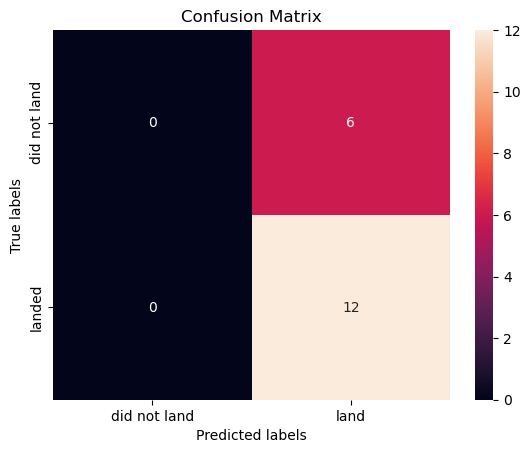

In [39]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [40]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
# ===== TASK 8 — Decision Tree + GridSearchCV (cv=10) — CORRECT (uses `tree_cv`) =====
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Use existing split if present; otherwise create it (target column 'Class')
try:
    X_train, X_test, Y_train, Y_test
except NameError:
    X = data.drop(columns=['Class'])
    y = data['Class'].to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.2, random_state=2, stratify=y if len(np.unique(y)) > 1 else None
    )

# Preprocessing: numeric -> impute+scale; categorical -> impute+onehot
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                          ('onehot', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ],
    remainder='drop'
)

# Decision Tree pipeline
tree_pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Grid search (IBM-style compact grid)
tree_param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [2, 4, 6, 8, None],
    'model__min_samples_split': [2, 4, 6]
}

tree_cv = GridSearchCV(tree_pipe, tree_param_grid, cv=10)
tree_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("best score on validation (cv):", tree_cv.best_score_)



tuned hyperparameters (best parameters): {'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2}
best score on validation (cv): 0.6535714285714286


In [44]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2}
accuracy : 0.6535714285714286


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [45]:
# ===== TASK 9 — Decision Tree accuracy on test data =====
print("Test set accuracy:", tree_cv.score(X_test, Y_test))
# ===== END TASK 9 =====


Test set accuracy: 0.6666666666666666


We can plot the confusion matrix


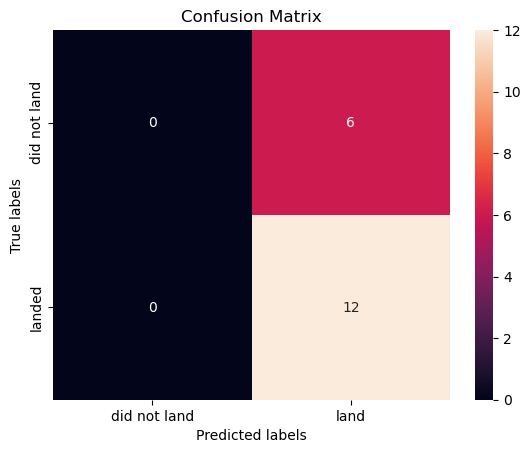

In [46]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [47]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [48]:
# ===== TASK 10 — K-Nearest Neighbors + GridSearchCV (cv=10) =====
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Preprocessing (reuse same structure as before)
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler())]), num_cols),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                          ('onehot', OneHotEncoder(handle_unknown='ignore'))]), cat_cols)
    ],
    remainder='drop'
)

# Build pipeline with KNN
knn_pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', KNeighborsClassifier())
])

# Parameter grid (IBM style)
parameters = {
    'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2]
}

knn_cv = GridSearchCV(knn_pipe, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("best score on validation (cv):", knn_cv.best_score_)
# ===== END TASK 10 =====


c:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

tuned hyperparameters (best parameters): {'model__algorithm': 'auto', 'model__n_neighbors': 4, 'model__p': 1}
best score on validation (cv): 0.669642857142857


In [49]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'model__algorithm': 'auto', 'model__n_neighbors': 4, 'model__p': 1}
accuracy : 0.669642857142857


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [50]:
# ===== TASK 11 — Accuracy of KNN on test data =====
print("Test set accuracy:", knn_cv.score(X_test, Y_test))
# ===== END TASK 11 =====


Test set accuracy: 0.2777777777777778


We can plot the confusion matrix


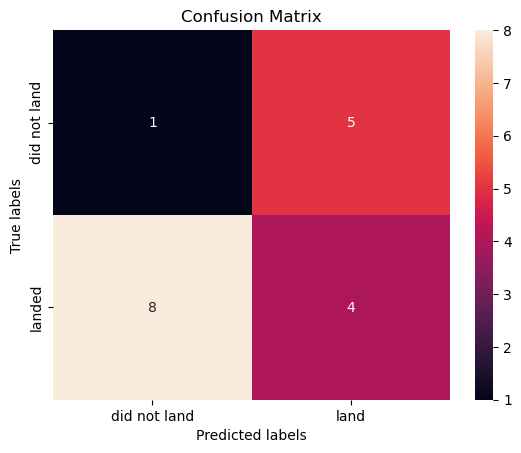

In [51]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [ ]:
# ===== TASK 12 — Compare all model accuracies and find the best =====

# Calculate each model's test accuracy
logreg_acc = logreg_cv.score(X_test, Y_test)
svm_acc = svm_cv.score(X_test, Y_test)
tree_acc = tree_cv.score(X_test, Y_test)
knn_acc = knn_cv.score(X_test, Y_test)

# Create a summary dictionary
model_performance = {
    "Logistic Regression": logreg_acc,
    "SVM": svm_acc,
    "Decision Tree": tree_acc,
    "KNN": knn_acc
}

# Display all accuracies
print("Model performance comparison:")
for model, acc in model_performance.items():
    print(f"{model}: {acc:.4f}")

# Find the best model
best_model = max(model_performance, key=model_performance.get)
print("\n✅ The best performing model is:", best_model, "with accuracy:", model_performance[best_model])


Model performance comparison:
Logistic Regression: 0.5556
SVM: 0.6667
Decision Tree: 0.6667
KNN: 0.2778

✅ The best performing model is: SVM with accuracy: 0.6666666666666666


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
